# 健壮性拟合
+ date: 2017-09-11
+ slug: robust-fitting

大概等于Hough变换。

## Sub Quadratic Loss Function

$$L_k(x)=\frac{x^2}{1+|x|^{2-k}}, \quad 0\leq k\leq 2$$

$$\lim_{x\to0} L_k(x)=x^2,\quad \lim_{x\to\infty} L_k(x)=x^k$$

At $|x|^{2-k}\ll 1$, it is $x^2$. That is $|x|<e^{-C/(2-k)}$, where $C\sim3$. 
In linear regression, we often use loss function $L_2(x)=x^2/2$ which leads to linear fitting.

## Gain Function
For $k=0$, we can define Gain function $$G(x)=1-L_0(x)=\frac{1}{1+x^2}$$

Consider scaling factor $l$, $$G_l(x)=\frac{1}{1+(x/l)^2}$$

For some parameter $\lambda$, calculate the gain $\Gamma(\lambda)=\sum_i G_l(x_i)$. The optimized gain means best estimation.

## Consider derivative

The derivative should be parallel to its side. Otherwise it will be abandoned. 

## 例子——正比例函数
此时Hough空间只有一维

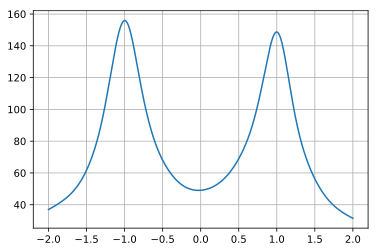

In [1]:
N=100
A=10
def gain(ds):
    return np.sum(exp(-(ds*ds)/2))
def distance(lamb, pts):
    k, b = lamb
    x, y = pts
    dy = y-(k*x+b)
    return gain(dy/A)
x0=arange(-N,N+1)
x=concatenate([x0, x0])
y=concatenate([x0, -x0])+A*randn(4*N+2)
l=array([distance((i, 0), (x, y)) for i in linspace(-2,2, 20*N+1)])
plot(linspace(-2,2, 20*N+1), l)
grid();

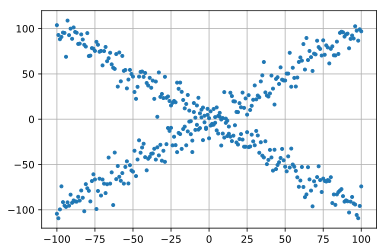

In [2]:
plot(x,y, '.');
grid();